In [12]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import tensorflow as tf

batch_size = 512
num_classes = 10
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name='keras_fashionmnist_trained_model_archi.h5'
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
def build_cnn(increase_depth):
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))

  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  if increase_depth:
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  # initiate Adam optimizer with learning rate=0.001
  opt = tf.keras.optimizers.Adam(learning_rate=0.001)

  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

  x_train_def = x_train.astype('float32')/255
  x_test_def = x_test.astype('float32')/255

  if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train_def, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test_def, y_test),shuffle=True)
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
      featurewise_center=False, # set input mean to 0 over the dataset
      samplewise_center=False, # set each sample mean to 0
      featurewise_std_normalization=False, # divide inputs by std of the dataset
      samplewise_std_normalization=False, # divide each input by its std
      zca_whitening=False, # apply ZCA whitening
      zca_epsilon=1e-06, # epsilon for ZCA whitening
      rotation_range=0, # randomly rotate images in the range (degrees, 0 to 180)
      # randomly shift images horizontally (fraction of total width)
      width_shift_range=0.1,
      # randomly shift images vertically (fraction of total height)
      height_shift_range=0.1,
      shear_range=0., # set range for random shear
      zoom_range=0., # set range for random zoom
      channel_shift_range=0., # set range for random channel shifts
      # set mode for filling points outside the input boundaries
      fill_mode='nearest',
      cval=0., # value used for fill_mode = "constant"
      horizontal_flip=True, # randomly flip images
      vertical_flip=False, # randomly flip images
      # set rescaling factor (applied before any other transformation)
      rescale=None,
      # set function that will be applied on each input
      preprocessing_function=None,
      # image data format, either "channels_first" or "channels_last"
      data_format=None,
      # fraction of images reserved for validation (strictly between 0 and 1)
      validation_split=0.0)
    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train_def)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train_def, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_test_def, y_test), workers=4)

  if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
  model_path = os.path.join(save_dir, model_name)
  model.save(model_path)

  scores = model.evaluate(x_test_def, y_test, verbose=1)
  print('Test loss:', scores[0])
  print('Test accuracy:', scores[1])

  return history

In [14]:
print("original depth")
history1 = build_cnn(increase_depth=False)

print("increase depth")
history2 = build_cnn(increase_depth=True)


original depth
Not using data augmentation.
Epoch 1/100
118/118 [==============================] - 6s 33ms/step - loss: 0.7568 - accuracy: 0.7228 - val_loss: 0.4525 - val_accuracy: 0.8396
Epoch 2/100
118/118 [==============================] - 4s 32ms/step - loss: 0.4283 - accuracy: 0.8443 - val_loss: 0.3741 - val_accuracy: 0.8630
Epoch 3/100
118/118 [==============================] - 4s 31ms/step - loss: 0.3654 - accuracy: 0.8655 - val_loss: 0.3219 - val_accuracy: 0.8815
Epoch 4/100
118/118 [==============================] - 4s 31ms/step - loss: 0.3221 - accuracy: 0.8819 - val_loss: 0.2981 - val_accuracy: 0.8896
Epoch 5/100
118/118 [==============================] - 4s 33ms/step - loss: 0.2979 - accuracy: 0.8901 - val_loss: 0.2834 - val_accuracy: 0.8898
Epoch 6/100
118/118 [==============================] - 4s 31ms/step - loss: 0.2794 - accuracy: 0.8980 - val_loss: 0.2626 - val_accuracy: 0.9013
Epoch 7/100
118/118 [==============================] - 4s 31ms/step - loss: 0.2611 - accurac

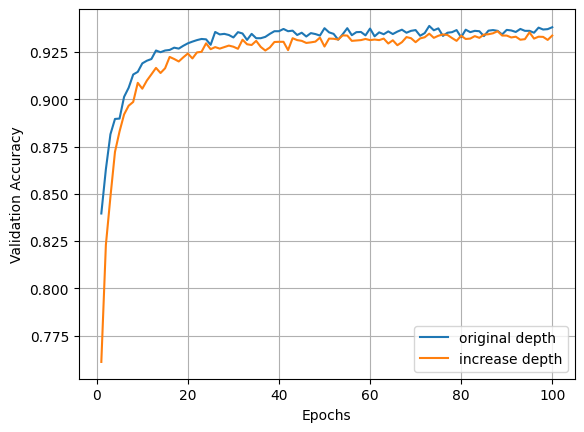

In [15]:
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, history1.history['val_accuracy'], label='original depth')
plt.plot(epochs_range, history2.history['val_accuracy'], label='increase depth')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()